In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import time

total_time = 2000
directory = "simulation_results/final_analysis"
filled_directory = "simulation_results/final_analysis_filled"

In [2]:


def load_and_process_data(probability):
    start_time = time.time()
    # Get list of relevant files first
    files = [f for f in os.listdir(directory) 
             if f.startswith(f'realization_{probability}_') and f.endswith('_vel.csv')]

    # Pre-allocate list with known size
    dfs = [None] * len(files)

    for i, file in enumerate(files):
        # Extract realization ID from filename
        realization_id = file.split('_')[2]
        
        # Read the CSV
        temp_df = pd.read_csv(os.path.join(directory, file))
        # Add is_generated column with False for original values
        temp_df['is_generated'] = False
        
        # If simulation ended early, calculate all new rows at once
        if temp_df['Time'].max() < total_time:
            timestep = temp_df['Time'].iloc[1]
            last_row = temp_df.iloc[-1]
            
            # Calculate all new time points
            new_times = np.arange(temp_df['Time'].max() + timestep, total_time + timestep, timestep)
            
            # Create DataFrame of new rows efficiently
            new_rows = pd.DataFrame([last_row] * len(new_times))
            new_rows['Time'] = new_times
            # Mark generated rows
            new_rows['is_generated'] = True
            
            # Concatenate once
            temp_df = pd.concat([temp_df, new_rows], ignore_index=True)
        
        # Add realization ID column
        temp_df['realization'] = realization_id
        dfs[i] = temp_df

    # Combine all dataframes at once
    df = pd.concat(dfs, ignore_index=True)
    # Time, zombiePercentage, averageVelocity as float
    df['Time'] = df['Time'].astype(float)
    df['Time'] = df['Time'].round(2)
    df['zombiePercentage'] = df['zombiePercentage'].astype(float)
    df['averageVelocity'] = df['averageVelocity'].astype(float)

    # realization as int
    df['realization'] = df['realization'].astype(int)

    df = df[df['Time'] <= total_time]

    # print df columns types
    print('Probability: ', probability, '\tTime taken: ', round(time.time() - start_time, 2), 's')
    return df

In [17]:
from graphs import plot_comparison_between_probabilities, plot_all


In [4]:
df_04 = load_and_process_data('0.4')
df_045 = load_and_process_data('0.45')
df_05 = load_and_process_data('0.5')
df_055 = load_and_process_data('0.55')
df_06 = load_and_process_data('0.6')
df_07 = load_and_process_data('0.7')
df_10 = load_and_process_data('1.0')


Probability:  0.4 	Time taken:  745.67 s
Probability:  0.45 	Time taken:  734.11 s
Probability:  0.5 	Time taken:  729.04 s
Probability:  0.55 	Time taken:  715.62 s
Probability:  0.6 	Time taken:  702.14 s
Probability:  0.7 	Time taken:  687.36 s
Probability:  1.0 	Time taken:  723.01 s


# Plot comparison between probabilities

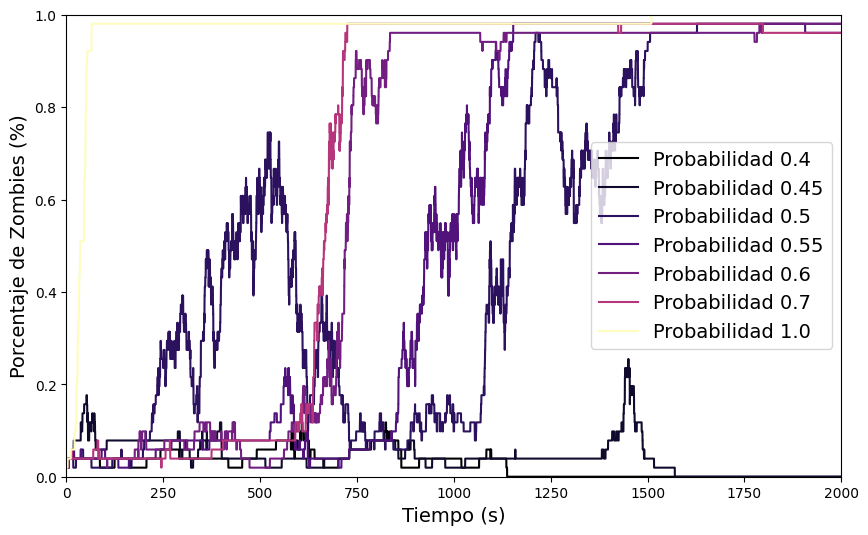

In [18]:
plot_comparison_between_probabilities([df_04, df_045, df_05, df_055, df_06, df_07, df_10], [0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 1.0])

# Plots for probability 0.4

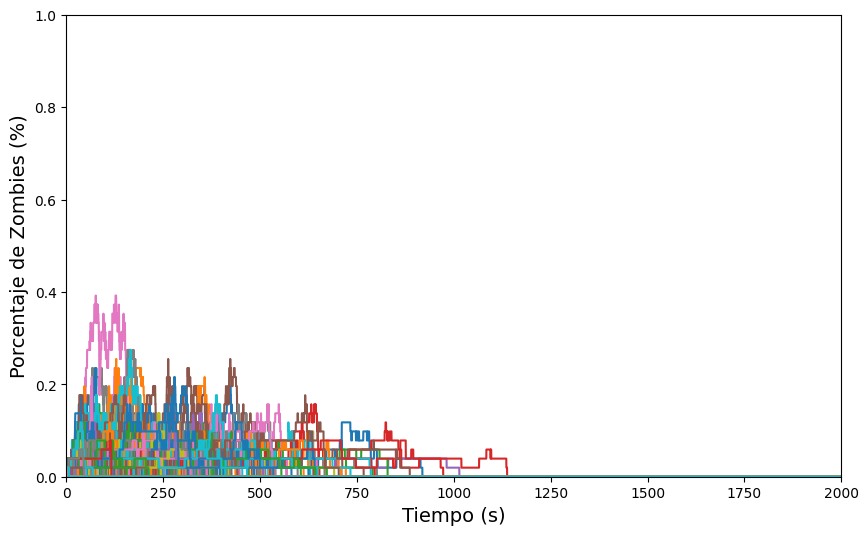

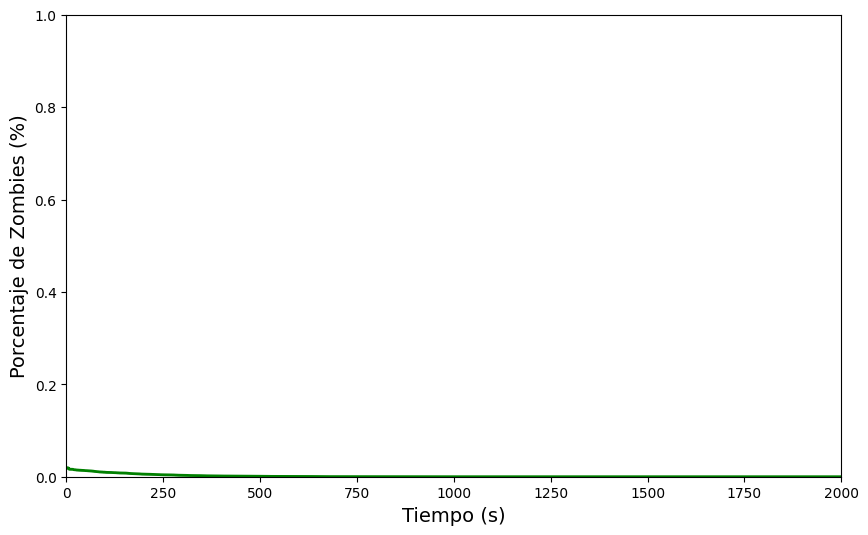

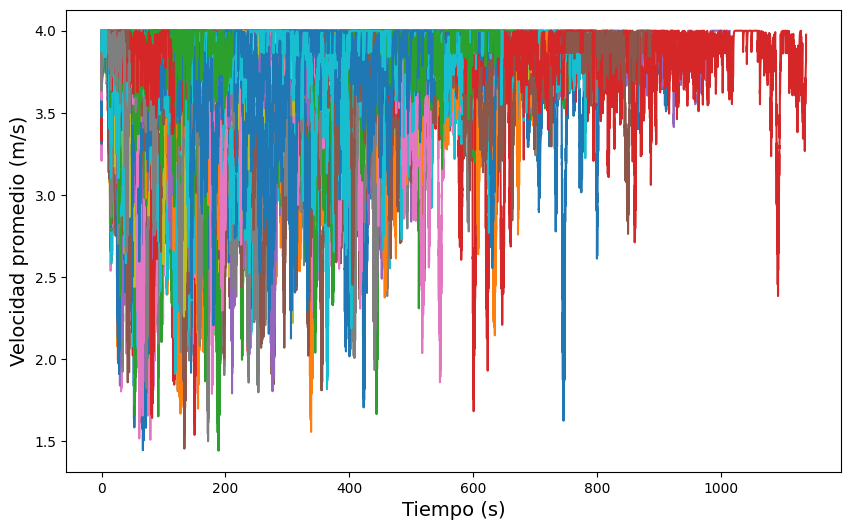

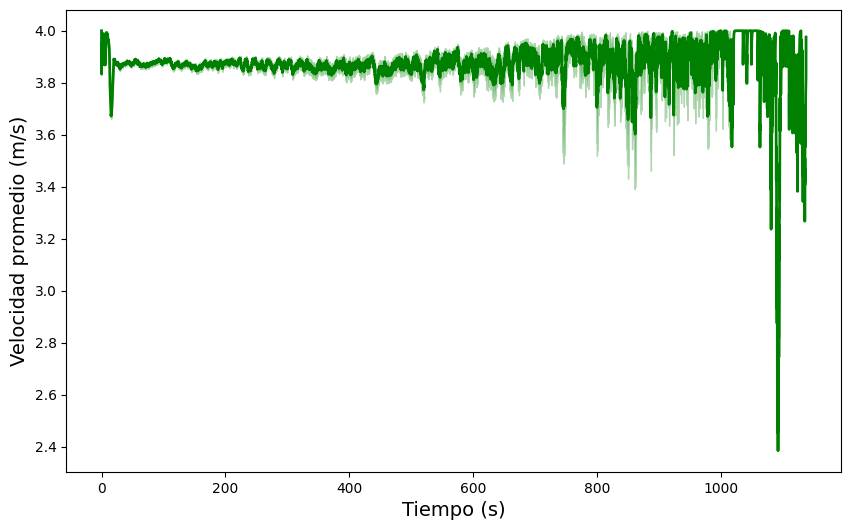

In [8]:
plot_all(df_04)

# Plots for probability 0.45

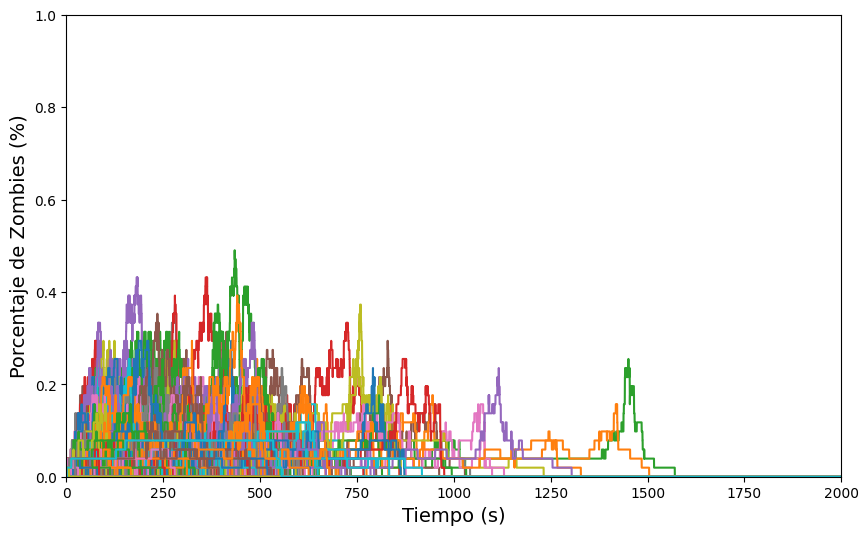

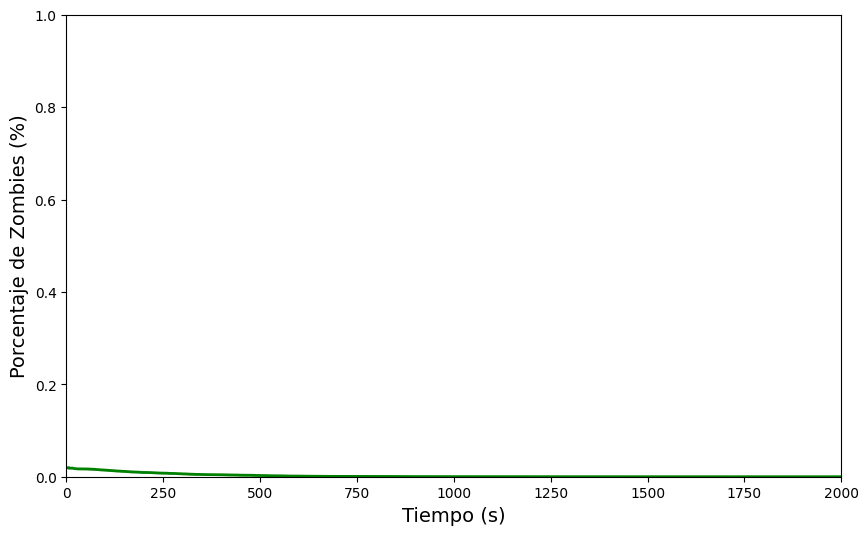

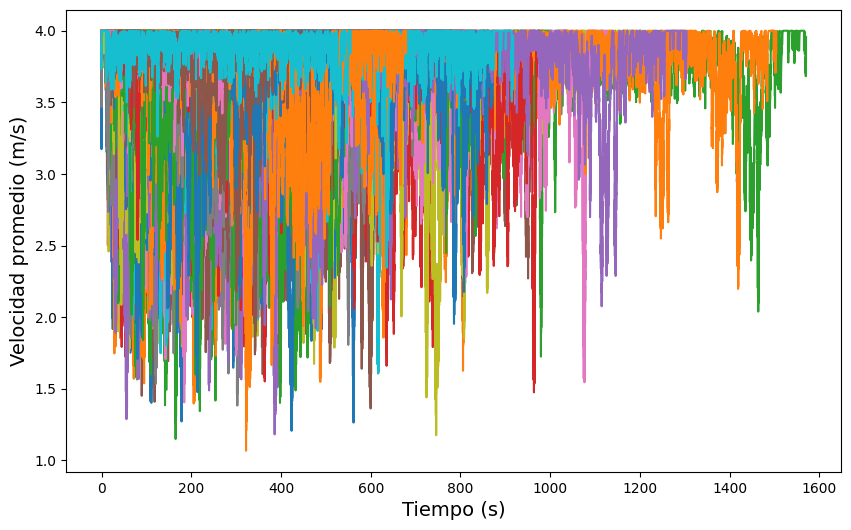

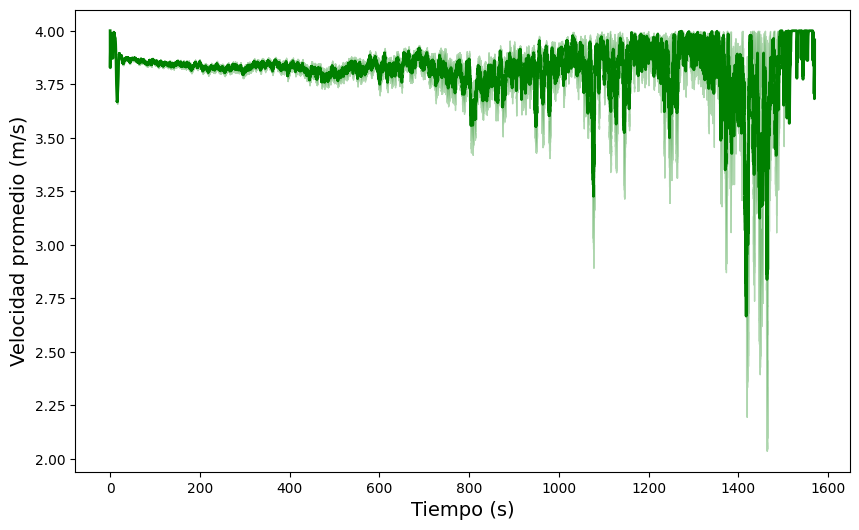

In [9]:
plot_all(df_045)

# Plots for probability 0.5

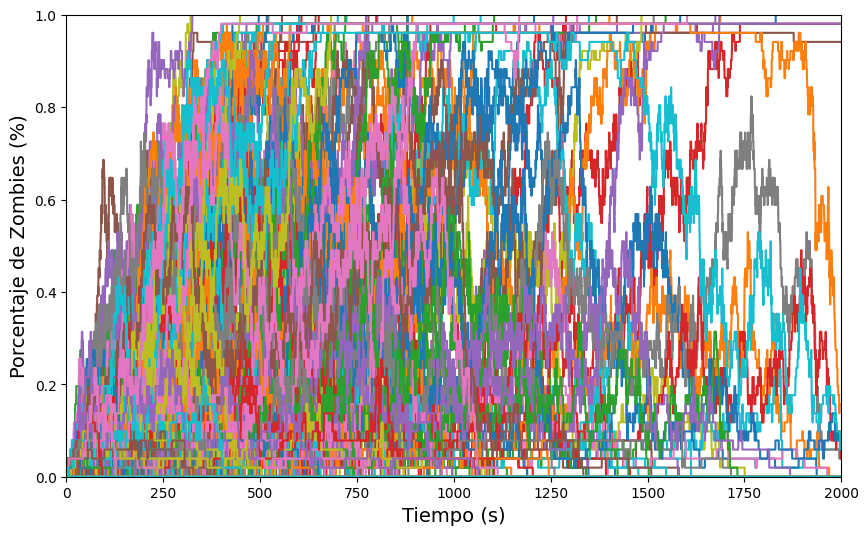

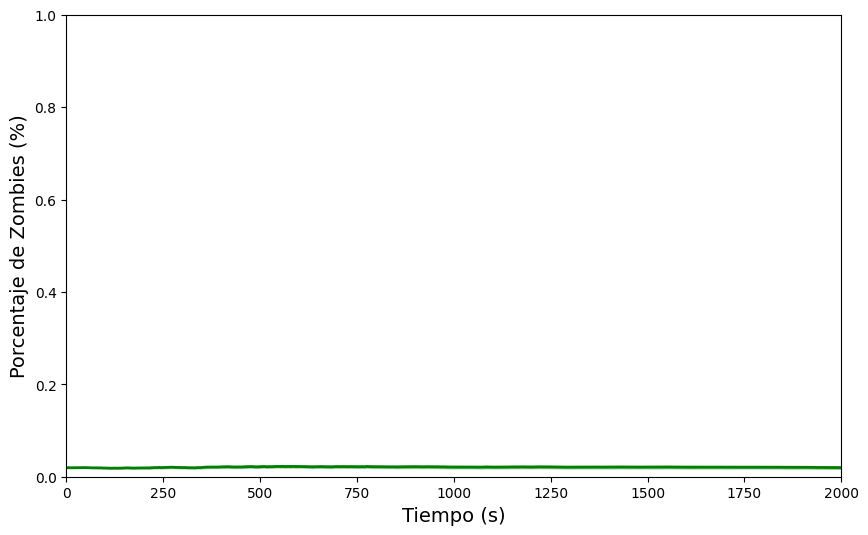

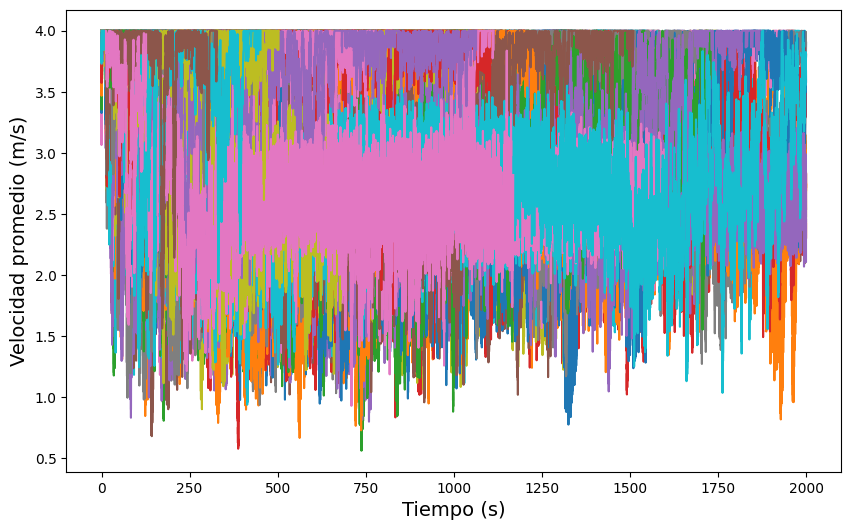

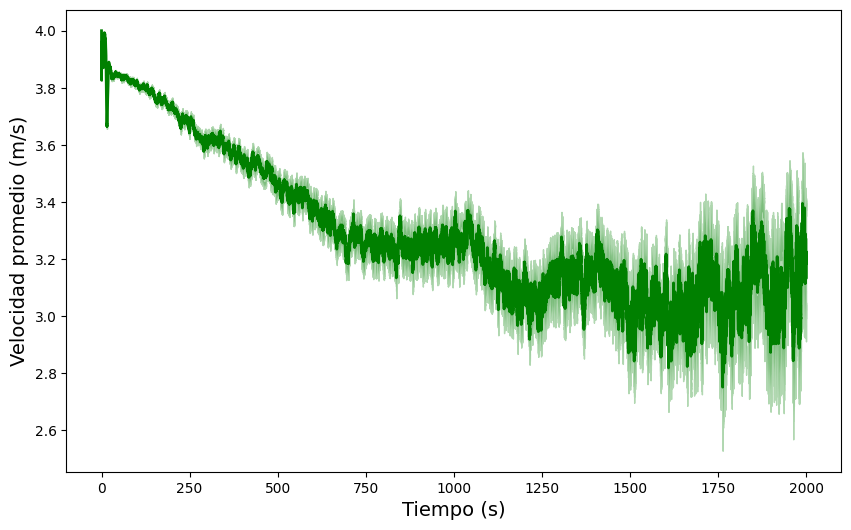

In [10]:
plot_all(df_05)

# Plots for probability 0.55

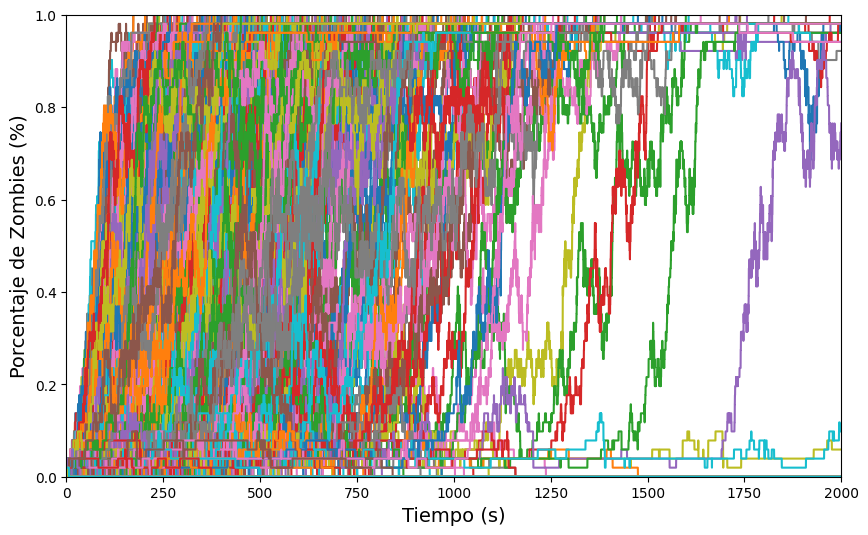

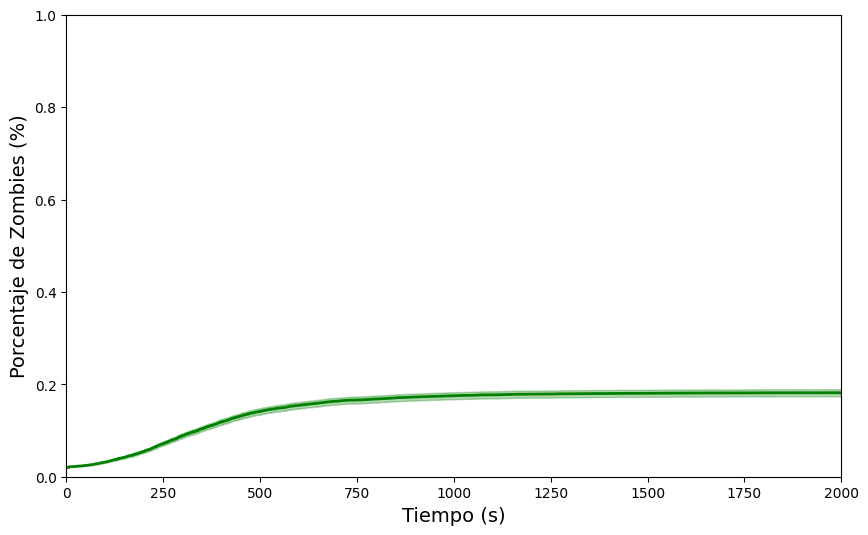

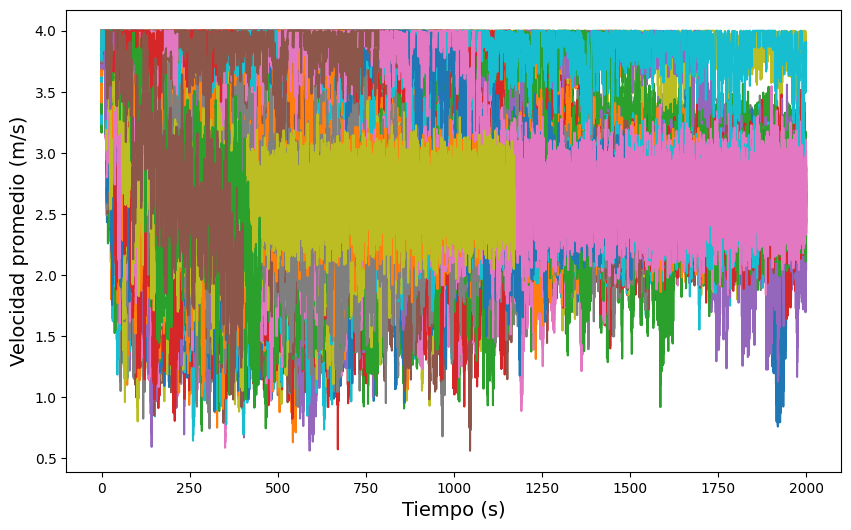

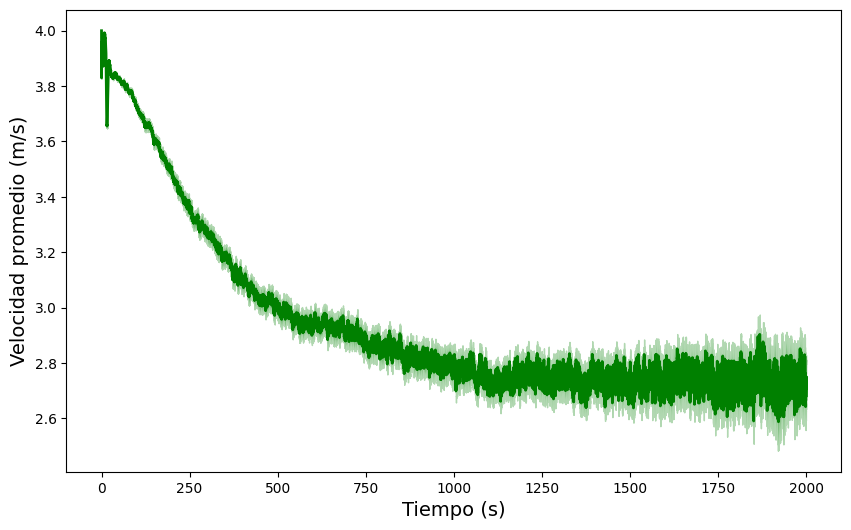

In [11]:
plot_all(df_055)

# Plots for probability 0.6

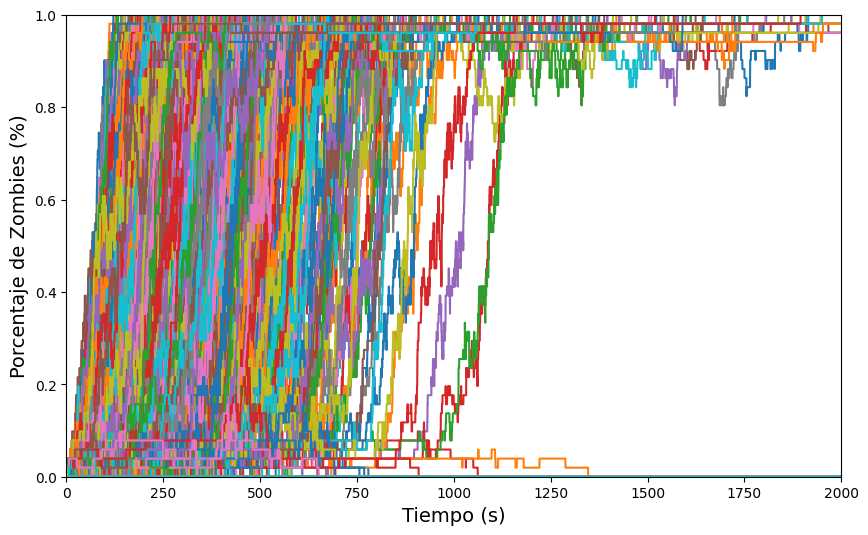

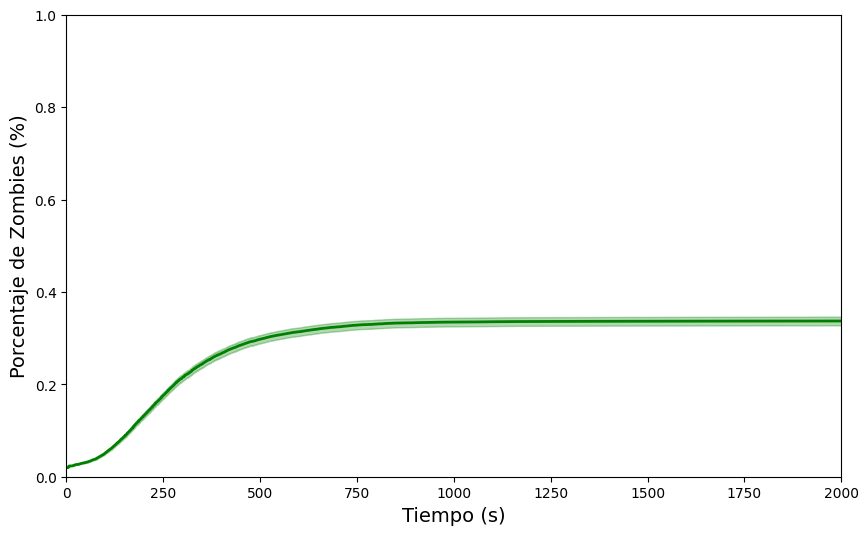

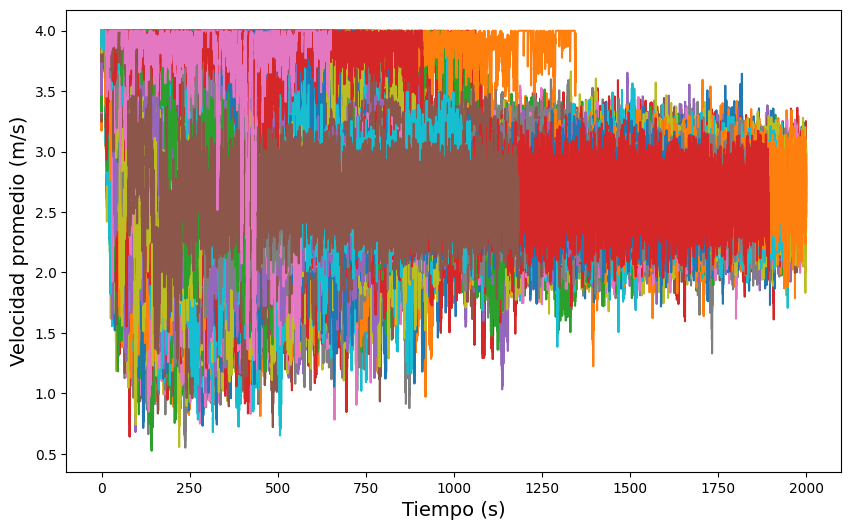

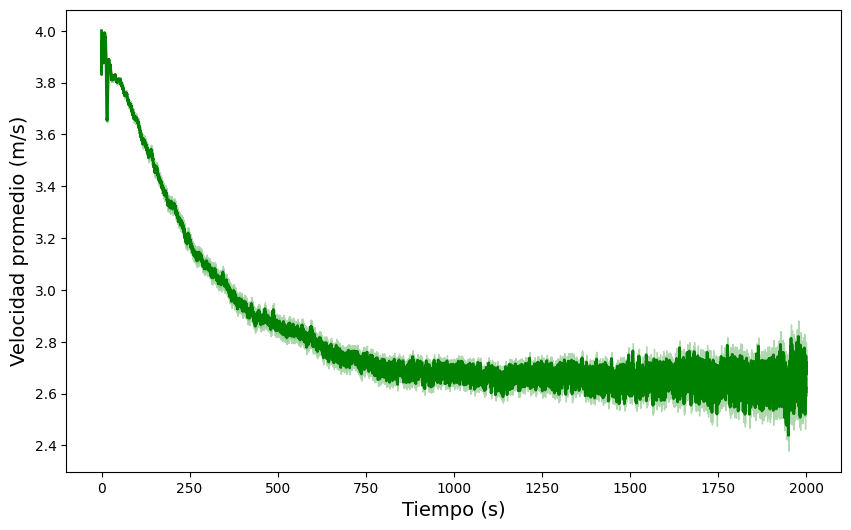

In [12]:
plot_all(df_06)

# Plots for probability 0.7

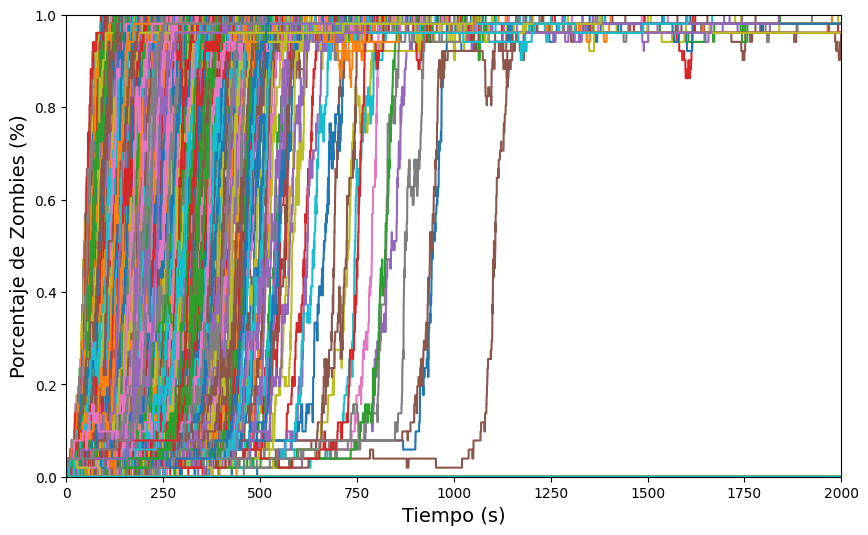

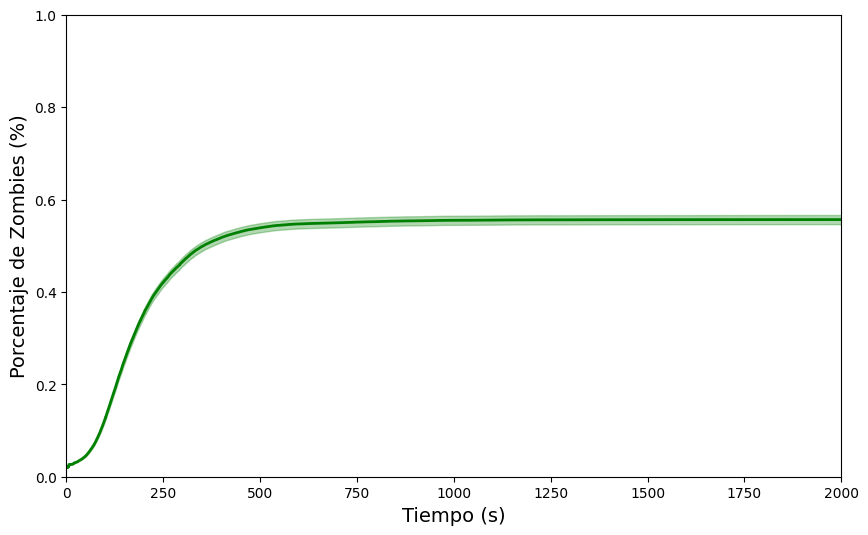

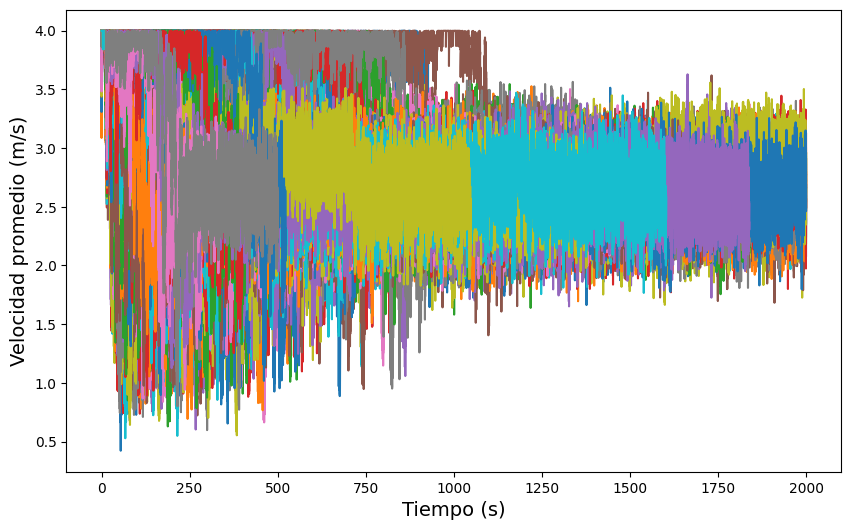

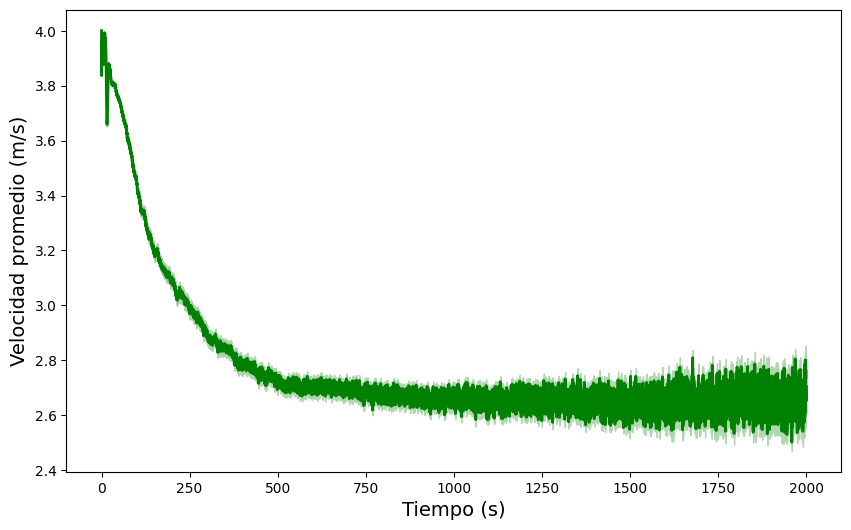

In [13]:
plot_all(df_07)

# Plots for probability 1.0

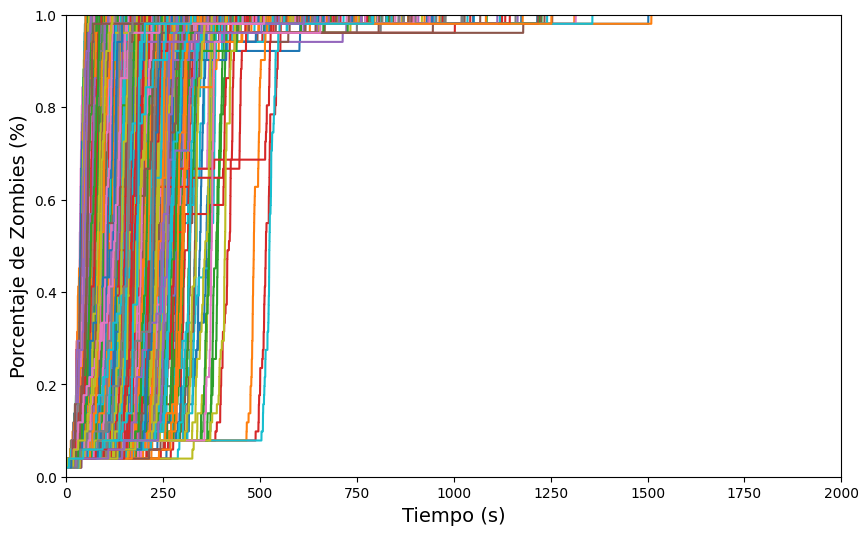

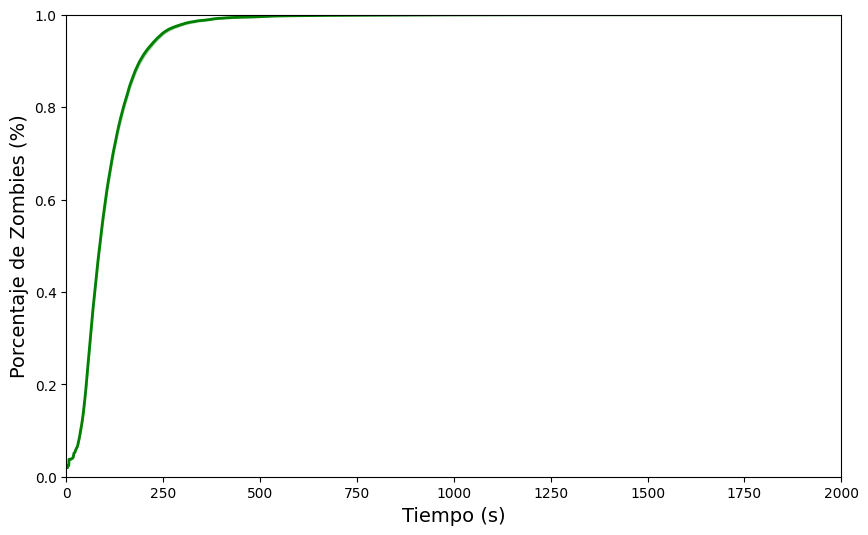

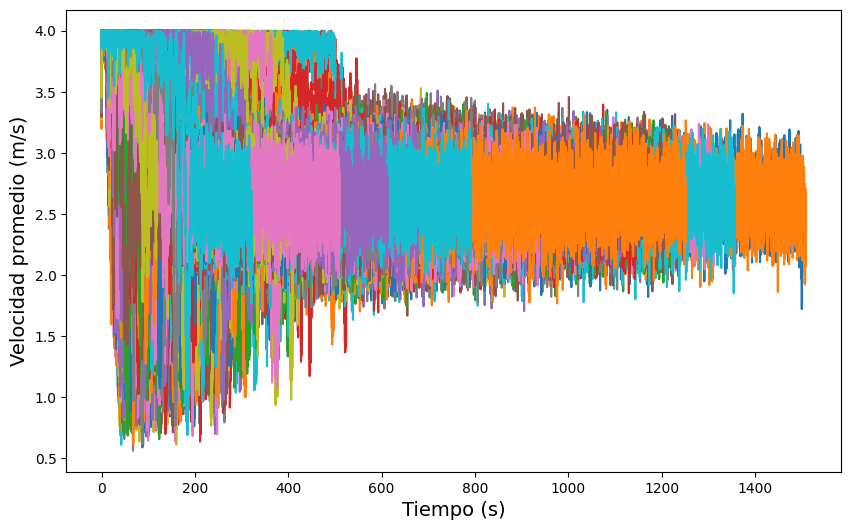

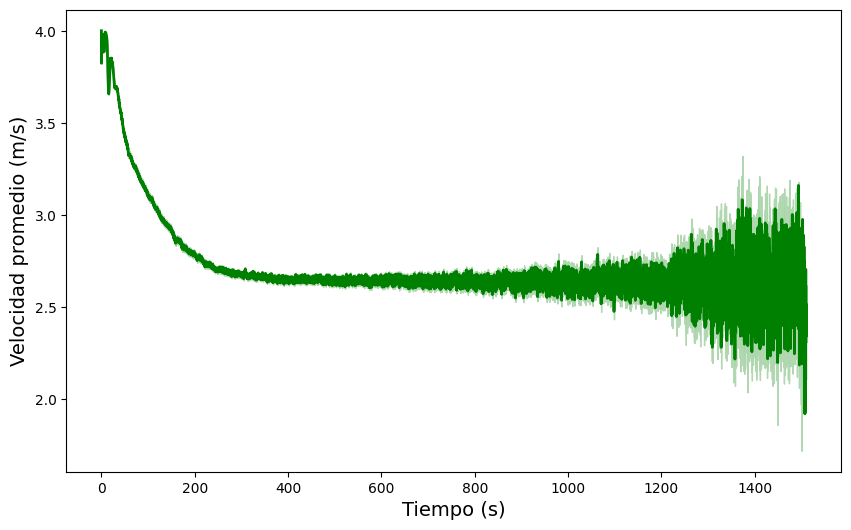

In [14]:
plot_all(df_10)
